In [9]:
#####Script to create fit functions to apply as prelim calibrations#####

#Uses data collected by Olivia Salmon, PhD, and Dr. LWelp
#Comments and code from Olivia Salmon, PhD.
#Adapted by Ali Meyer 2018 (meyer269@purdue.edu)
#Adapted by Bode Hoover 2020 (hoover59@purdue.edu)

In [58]:
# Install necessary packages
#install.packages("locfit")
library(KernSmooth)
library(locfit)
#source(Oliviafitfn.RData)
load("/Users/bodehoover/Downloads/Welp Research Group/Water Vapor Calibration/Oliviafitfn.RData")

In [10]:
####Load in cal data provided by Olivia####
cal_data <- read.delim("/Users/bodehoover/Downloads/Welp Research Group/Water Vapor Calibration/finaldata_enriched_v2.txt", header = TRUE, sep=",", stringsAsFactors = FALSE)

In [11]:
####Define your calibration H2O, dD, and d18O variables in you cal_data df####
H2O_cal <- cal_data$H2O_filteravg
D_cal <- cal_data$D_adj
O18_cal <- cal_data$O18_adj

#(Olivia) I had to NaN out some ranges where the nebulizer was clogged or data was variable
#(Olivia) ( should have done this in my Step_1 cal script but I gues a few slipped through the cracks
D_cal[1:2] <- NA
D_cal[179] <- NA
D_cal[1042] <- NA
D_cal[1097] <- NA
D_cal[1160: 1166] <- NA
D_cal[1359: 1361] <- NA

O18_cal[1:2] <- NA
O18_cal[1097] <- NA
O18_cal[1160:1166] <- NA
O18_cal[1359] <- NA

In [12]:
#####Make data frames for dD and d18O and get rid of the nan rows####
df_D <- data.frame(H2O_cal,D_cal)
df_D <- na.omit(df_D)

df_O18 <- data.frame(H2O_cal,O18_cal)
df_O18 <- na.omit(df_O18)


#(Olivia) not sure why I did this extra step -
#(Olivia) I think I was copying a script I found online
xD <- df_D$H2O_cal
yD <- df_D$D_cal

xO18 <- df_O18$H2O_cal
yO18 <- df_O18$O18_cal
# Note that xD = xO18

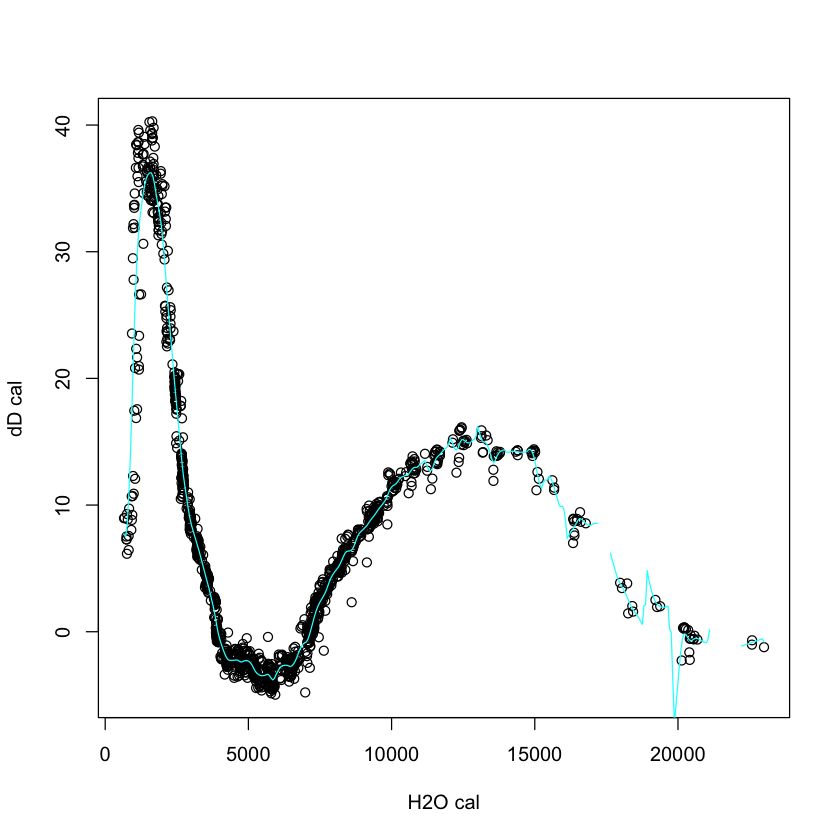

In [30]:
###Plot cal data and apply a sliding best fit line####
#This will plot the dD vs H2O cal data and add a local polynomial fit line 
#The fitting uses a sliding 100 ppmv window
    #THIS YOU CAN CHANGE TO CREATE A BETTER FIT!
      #bandwidth= the number of obs that 
plot(xD,yD, xlab = "H2O cal", ylab = "dD cal")
lines(locpoly(xD, yD, bandwidth= 100, degree=1), col=5)

In [22]:
####Create a fit fn for the above line####
#These lines build the fit function of the local polynomial fit line plotted in the lines above
fit_D <- locpoly(xD, yD, bandwidth=100, degree=1)
fitfn_DOlivia <- approxfun(fit_D$x, fit_D$y)

#yhat_D = the dD values defined by the local polynomial fit funciton
yhat_D <- fitfn_DOlivia(xD)

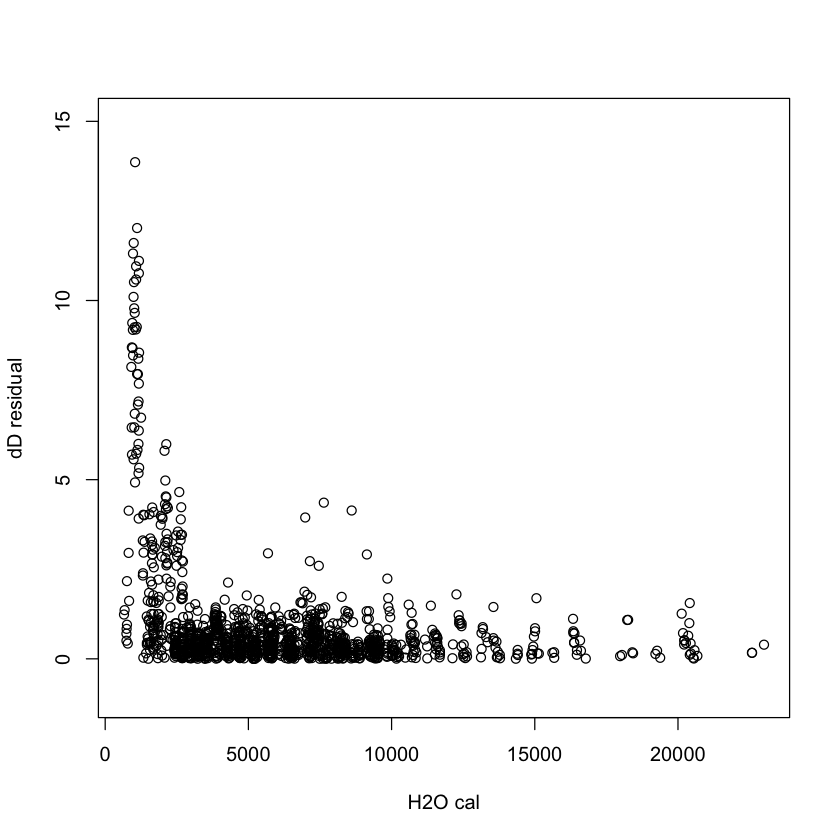

In [31]:
###Calculate and plot residuals dD####
residual_D <- yD - yhat_D
#plot (xD, residual_D, ylim=c(-14, 14))
abs_res_D <- abs(residual_D)
plot (xD, abs_res_D, ylim=c(-1, 15), xlab = "H2O cal", ylab = "dD residual")

In [25]:
#Repeat above steps for d18O

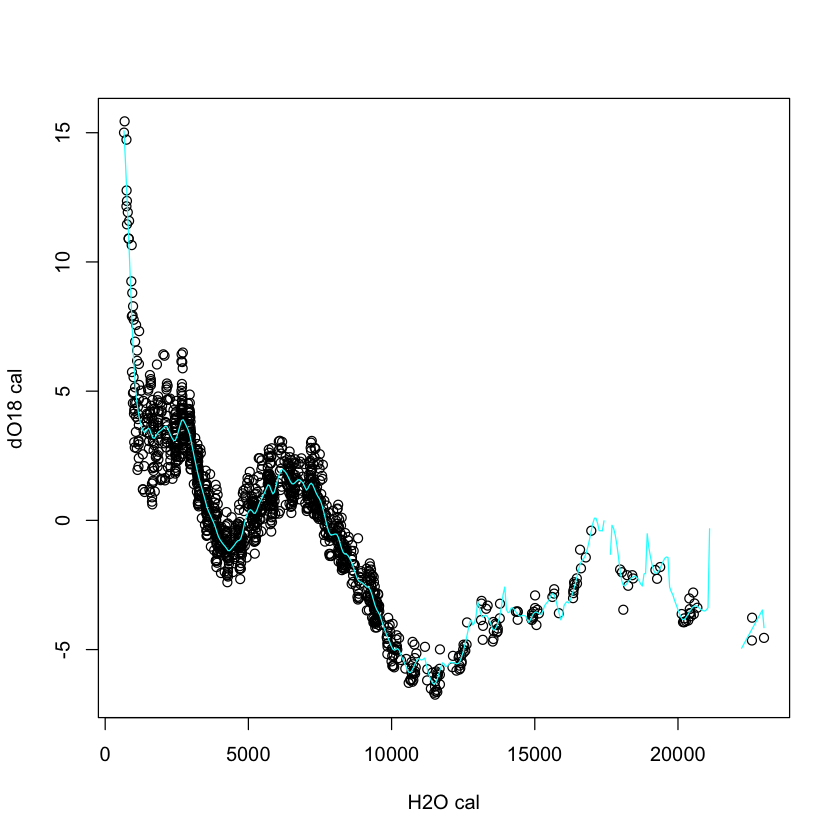

In [52]:
plot(xO18, yO18, xlab = "H2O cal", ylab = "dO18 cal")
lines(locpoly(xO18, yO18, bandwidth=100, degree=1), col=5)
fit_O18 <- locpoly(xO18, yO18, bandwidth=100, degree=1)
fitfn_O18Olivia <- approxfun(fit_O18$x, fit_O18$y)

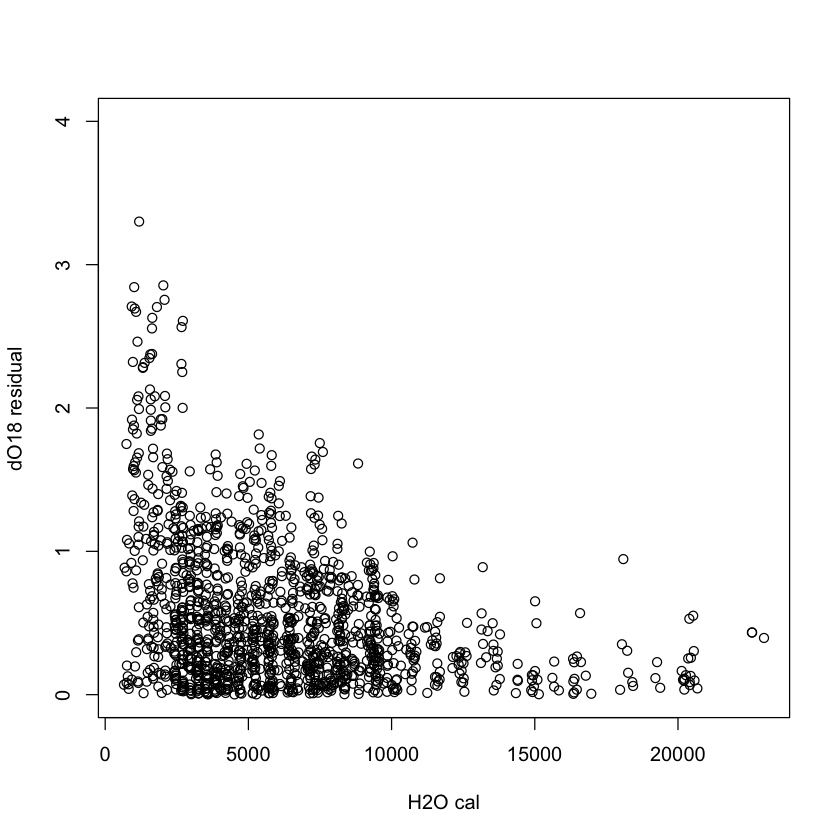

In [48]:
yhat_O18 <- fitfn_O18Olivia(xO18)

residual_O18 <- yO18 - yhat_O18
#plot (xO18, residual_O18, ylim=c(-4, 4))
abs_res_O18 <- abs(residual_O18)
plot (xO18, abs_res_O18, ylim=c(0, 4), ylab = "dO18 residual", xlab = "H2O cal")

In [35]:
#Save fit functions and cal curve values
#Change name of file if adjusting anything in the code
#save(fitfn_DOlivia, fitfn_O18Olivia, xD, yD, x18O, y18O, file = "Oliviafitfn.RData")

In [59]:
####Write data tables for the fit residuals of the local polynomial regression####
#This data was used to define a component of the uncertainty
enriched_residual_D <- data.frame(xD, residual_D, abs_res_D)
enriched_residual_O18 <- data.frame(xO18, residual_O18, abs_res_O18)

In [65]:
####Save data table of residuals####
#Change name if adjusting anything in the code
write.table(enriched_residual_D, "Residuals_enriched_DBode.txt", row.names=FALSE, sep=",")
write.table(enriched_residual_O18, "Residuals_enriched_O18Bode.txt", row.names=FALSE, sep=",")